In [6]:
import time
import datetime
import sqlite3
import pandas as pd
import matplotlib as plt

# Erstmal das heutige Datum feststellen
today = datetime.datetime.today()
print(today)
weeknr = today.isocalendar()[1]
print(weeknr)

# Daten aus Datenbank laden
connection = sqlite3.connect('../db.sqlite3')
df = pd.read_sql_query("""SELECT bayern3.id, datum_zeit, interpret, titel FROM bayern3 
                        INNER JOIN songs ON bayern3.song=songs.id""", connection, index_col='id')
connection.close()

# Spalte mit der Kalenderwoche hinzufügen
df['woche'] = pd.to_datetime(df['datum_zeit']).dt.week

# Separaten DataFrame für den Vergleich
vergleich = pd.DataFrame()
# Eine Spalte je Kalenderwoche, titel als Index
for i in range(weeknr-5, weeknr+1):
    vergleich['KW'+str(i)] = df[df['woche'] == i].groupby('titel').count().sort_values(by='datum_zeit', ascending=False)['datum_zeit']
# Alle Zeilen droppen, die NaN enthalten (liegt vor, wenn der Titel in einer Woche nicht gespielt wurde)
vergleich = vergleich.dropna(how='any')
# Alternativ mit 0 ersetzen
# vergleich = vergleich.fillna(value=0)
vergleich.head(10)

2018-03-27 17:28:06.854848
13


,KW8,KW9,KW10,KW11,KW12,KW13
titel,,,,,,
Feel it still,35,28.0,27.0,25.0,27.0,5.0
Leave A Light On,30,26.0,16.0,12.0,33.0,7.0
Perfect,30,20.0,29.0,13.0,17.0,4.0
More Than Friends,29,26.0,27.0,28.0,33.0,6.0
Crazy,28,33.0,28.0,28.0,27.0,7.0
Havana,28,25.0,23.0,25.0,28.0,5.0
For You,27,13.0,31.0,29.0,22.0,10.0
Échame la Culpa,23,33.0,28.0,28.0,26.0,8.0
Rooftop,22,24.0,19.0,25.0,26.0,7.0


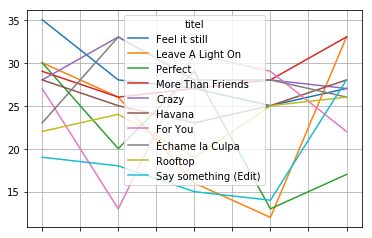

In [5]:

vergleich.T.iloc[:,0:10].plot()
plt.pyplot.grid(True)